<a href="https://colab.research.google.com/github/CREVIOS/SSI_2020/blob/master/Lecture_5_1_Logistic_Regression_%5BSOLUTION%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codealong - Binary Logistic Regression

In this codealong, you are going to be using sklearn to perform Binary Logistic Regression

# New section

## 0. Setup

First, run the cells containing our necessary imports and the code to load in the dataset and filter it down to just 4's and 7's.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_train = pd.read_csv("sample_data/mnist_train_small.csv")
display(data_train)
data_test = pd.read_csv("sample_data/mnist_test.csv")
display(data_test)

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19995,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19996,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19997,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# data_train = data_train.loc[(data_train["6"] == 4) | (data_train["6"] == 7), :]
data_train = data_train.loc[:4000, :].to_numpy()
display(data_train)

# data_test = data_test.loc[(data_test["7"] == 4) | (data_test["7"] == 7), :]
data_test = data_test.loc[:1000, :].to_numpy()
display(data_test)

array([[5, 0, 0, ..., 0, 0, 0],
       [7, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]])

array([[2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [9, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## 1. Setup the Data

Following the below steps, divide our data to ultimately be `X_train`, `X_val`, `X_test`, `y_train`, `y_val`, and `y_test`. 

In [ ]:
# TODO: Split test into val and test
split_index = data_test.shape[0] // 2
data_val, data_test = np.split(data_test, [split_index])

In [ ]:
# TODO: Split into X_train, y_train, X_val, y_val, X_test, and y_test
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_val = data_val[:, 1:]
y_val = data_val[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

If you seperated everything properly, you should be able to run the following code and see a 4!

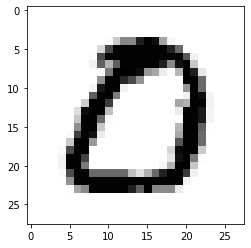

In [ ]:
row = X_train[5].reshape((28, 28))
plt.imshow(row, cmap="Greys")

## 2. “Train” our model and get its F1 Score

Write code to create a logistic regression model with no penalty and fit it to our train data. See the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for sklearn's `LogisticRegression` class.

In [ ]:
# TODO: Create and fit our logistic regression model
import sklearn.linear_model

model = sklearn.linear_model.LogisticRegression(penalty='none')
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Get our model to predict on the val set, and find its F1 Score (using `sklearn.metrics.f1_score` as we did in 4.4).

In [ ]:
# TODO: Predict on the val set and get the F1 Score
import sklearn.metrics

yhat_val = model.predict(X_val)
print(yhat_val)
sklearn.metrics.f1_score(y_val, yhat_val, average='macro')

[2 1 0 4 1 4 9 6 9 0 8 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 5 7 2 7 1
 2 1 1 9 4 2 3 5 1 2 4 4 6 3 5 5 2 0 4 1 9 0 7 8 2 3 7 4 2 4 3 0 7 0 2 9 1
 7 3 2 9 7 9 6 2 7 8 4 7 5 6 1 3 6 2 3 1 4 1 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7
 3 9 7 8 4 4 9 8 5 9 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 9 6 7 2 1 7 1 8 2 0
 9 9 3 5 8 1 5 6 0 3 1 4 6 5 4 6 5 4 5 1 4 4 7 2 3 2 9 1 8 1 8 1 8 5 0 3 9
 2 3 0 8 1 1 0 7 0 2 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 0 9 3 9 0 3 6 5 5 7 2 2
 7 1 2 8 4 1 7 3 3 8 7 7 9 2 2 4 1 5 8 8 7 2 5 0 2 4 6 4 1 4 5 7 7 2 3 2 0
 5 5 7 7 9 1 8 1 9 0 3 0 1 9 9 4 1 8 2 1 2 9 8 5 9 2 6 4 1 5 4 2 9 2 0 4 0
 0 2 8 1 7 1 2 4 0 2 9 4 3 3 0 0 4 1 9 6 5 3 5 7 7 9 3 9 4 2 0 7 1 1 3 1 5
 3 3 9 7 8 6 1 6 1 3 5 1 0 5 1 3 1 5 0 6 1 8 5 1 9 4 4 6 7 1 5 0 2 8 6 3 7
 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 7 2 5 6 1 9 5 2 5 4 4 2 8 3 8 2 4 9 0
 3 1 7 9 5 7 9 7 1 9 2 1 4 0 9 2 0 9 9 1 4 8 1 8 4 5 9 7 8 3 7 5 0 0 3 0 8
 0 6 4 8 5 3 2 6 3 7 1 2 6 8 0 5 6 6 6 3 8 8 2 9 5 8 9 6 1 8 4 1 2 2 8 1 9
 7 5 4 0 8 9 9 1 0 5 2 3 

0.8461332865686988

## 3. Create and “train” a new model, with new hyperparameters, and get its F1 Score

Now, create and fit a new logistic regression model, passing in penalty as `penalty="l2"` and `max_iter=500`.

In [ ]:
# TODO: Create and fit our logistic regression model
model = sklearn.linear_model.LogisticRegression(penalty='l2', max_iter=500)
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Once again, get our model to predict on the val set and get its F1 Score!

In [ ]:
# TODO: Predict on the val set and get the F1 Score
y_hat = model.predict(X_val)
print(y_hat)
sklearn.metrics.f1_score(y_val, y_hat, average='macro')

[2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7 1
 2 1 1 9 4 2 3 5 1 2 4 4 6 3 5 5 2 0 4 1 9 0 7 8 9 3 7 4 3 4 3 0 7 0 2 9 1
 7 3 2 9 7 9 6 2 7 8 4 7 5 6 1 3 6 2 3 1 4 8 7 6 9 6 0 5 4 9 9 2 1 9 4 8 7
 3 9 7 4 4 4 9 7 5 9 7 6 7 9 0 5 8 5 6 6 5 7 8 1 0 1 6 9 6 7 3 1 7 1 8 2 0
 9 9 3 5 5 1 5 6 0 3 1 4 6 5 4 6 5 4 5 1 4 4 7 2 9 2 8 1 8 1 8 1 8 5 0 8 9
 2 3 0 1 1 1 0 3 0 8 1 6 4 2 3 6 1 1 1 3 9 5 2 9 4 5 9 3 9 0 3 6 5 5 7 2 2
 7 1 2 8 4 1 7 3 3 8 7 7 9 2 2 4 1 5 8 8 7 2 5 0 9 4 2 4 5 4 5 7 7 2 3 2 0
 8 5 7 7 9 1 8 1 8 0 3 0 1 9 9 4 1 8 2 1 2 9 8 5 9 2 6 4 1 5 4 2 9 2 0 4 0
 0 2 8 1 7 1 2 4 0 2 9 4 3 3 0 0 4 1 9 6 4 3 5 7 7 9 3 4 4 2 0 7 1 1 1 1 5
 3 3 9 7 8 6 5 6 1 3 8 1 0 5 1 3 1 5 0 6 1 8 5 1 7 4 3 6 7 1 5 0 7 8 6 3 7
 2 0 8 8 5 4 1 1 4 0 3 3 7 6 1 6 2 1 9 2 5 6 1 9 5 2 5 4 4 2 8 3 5 2 4 0 0
 3 1 7 7 3 7 9 7 1 9 2 1 4 5 9 2 0 9 9 1 4 8 1 8 4 5 9 8 8 3 7 6 0 0 3 0 8
 7 6 4 8 5 5 2 2 3 7 1 2 6 8 0 5 6 6 6 3 8 8 2 9 8 8 9 6 1 8 4 1 2 2 8 1 9
 7 5 4 0 8 9 9 1 0 5 2 3 

0.867381900053808

You should find that the F1 Score is slightly better. Let's predict one last time on our *Test Set* and find the F1 Score.

In [ ]:
# TODO: Predict on the test set and get the F1 Score
y_hat_test = model.predict(X_test)
print(y_hat_test)
sklearn.metrics.f1_score(y_test, y_hat_test, average='macro')

[9 5 2 1 3 1 5 6 8 7 8 2 2 7 3 2 6 5 4 8 9 7 1 3 0 3 8 5 1 9 3 4 4 6 4 1 1
 2 2 8 4 2 2 4 3 0 2 3 2 9 7 0 6 7 4 4 7 9 6 9 5 9 8 0 9 6 0 6 4 5 4 5 3 3
 9 3 3 2 7 8 0 2 2 1 7 0 6 5 4 3 3 0 9 6 3 8 0 9 9 6 2 6 8 5 7 3 6 0 2 9 0
 2 8 1 1 9 7 5 1 0 8 4 6 8 6 7 9 9 6 9 8 2 2 9 2 7 3 5 9 1 8 0 2 0 5 5 1 3
 7 6 7 1 1 5 8 0 3 4 8 4 0 9 1 8 6 7 7 4 3 4 9 1 9 5 1 7 3 9 7 6 9 1 3 2 2
 3 3 6 7 2 4 7 8 5 1 1 4 9 3 1 0 7 7 0 7 9 9 4 8 5 5 4 0 4 2 3 6 8 4 2 0 4
 0 6 1 7 3 8 6 7 2 6 9 5 1 4 6 8 5 4 8 0 6 2 1 7 3 4 1 0 3 4 3 1 1 7 4 9 9
 9 8 4 0 2 4 5 1 1 6 4 7 1 9 4 2 4 1 5 5 3 8 3 1 4 5 6 3 9 4 1 9 3 8 0 3 2
 5 1 2 9 3 4 4 2 8 3 3 3 1 3 3 5 9 6 3 2 6 1 3 6 0 7 2 1 7 1 9 2 4 3 1 9 9
 6 1 1 8 4 3 1 7 7 4 2 5 7 3 1 3 1 0 7 7 0 3 5 3 2 7 6 6 9 2 8 5 5 2 2 5 6
 0 8 2 9 2 8 2 8 8 7 9 9 5 0 6 6 8 2 1 3 2 2 9 2 0 0 5 7 8 1 4 4 6 0 2 9 1
 4 7 4 7 3 9 8 8 4 7 1 2 1 2 2 3 8 3 2 3 9 1 7 4 0 3 5 5 8 6 5 0 6 7 6 6 5
 8 9 9 1 1 2 5 6 4 9 5 6 3 3 1 7 8 9 1 1 0 9 1 4 5 5 4 5 6 2 3 3 1 5 1 2 0
 2 8 1 8 6 7 1 6 3 3 4 0 

0.8265568532699046

# [Optional] Codealong - Multiclass Logistic Regression

Modify the previous code to run Multiclass Logistic Regression and run everything from the top again!

*Hint: It only requires commenting out two lines of code!*

Solution: Comment out the two lines in 0. Setup that filter the dataset down to 4's and 7's!